# This work is redudant 

After a full exploration, this work largely reproduces the findings of "Overcoming catastrophic forgetting in neural networks" (2017, Kirkpatrick et al., PNAS). 
It was fun, but I'm moving onto other things. 

# Super-efficient sufficient statistics for online deep learning 

_W. Evan Durno, 2022_

## Executive summary of current state 

Here, I derive asymptotic sufficient statistics for any model with a likelihood satisfying a few regularity assumptions. 
Thus, sufficient statistics are now available to deep learning models, and it is now theoretically possible 
to store any amount of data in a finite-dimensional representation. 
Further, these asymptotic sufficient statistics lend to approximate update equations, 
and thus have the potential to solve or mitigate catastrophic forgetting. 
Naturally, this representation is still large, so approximations are studied. 
Experiments in natural language processing (NLP) and reinforcement learning (RL) support my resutls. 
I deem this approach the _analytic memory system (AMS)_. 

Further, the AMS turns-out to be a regularizer, and thus reduces parameter space dimension during online estimation. 
Constraining the estimate to an eventually unbiased sub-manifold results in a shrunk Fisher Information Matrix. 
The result is a slightly-lower Cramer-Rao bound, and so AMS estimates can be more-efficient than maximum likelihood estimates (MLEs). 
Given the increased efficiency, I deem such estimation methods _super-efficient_. 

AMS' application is primarily miniaturization. 
Solving catestrophic forgetting means data-retaining infrastructure is no-longer required. 
So, this work lays theory capable of decoupling AI from the data center. 

A secondary application is in model distribution. 
Distributing models' sufficient statistics means recipients can update them without suffering catestrophic forgetting. 
For example, in theory, it is now possible to distribute quality language models such that third parties can fine-tune them toward industry-specific applications. 

## Introduction 

The key insight is in observing the asymptotic behavior of likelihoods. 

$$ \hat \theta_{MLE} \to_{a.s.} \arg \max_\theta \frac{-1}{2} (\theta - \theta_0)^T \mathcal{I}_{\theta_0} (\theta - \theta_0) $$

With this information, we may pack all previously observed $n_1$ samples into this quadratic form regularizer 
centered around the $n_1^{th}$ estimate $\hat \theta_{n_1}$. 
Notice that the regularization term $\lambda$ is now exactly solvable.

$$ \hat \theta_{n_1+n_2} := \arg \max_\theta n_2^{-1} \sum_{i=n_1+1}^{n_1+n_2} \log f_X(X_i;\theta) - \frac{n_1}{2n_2} (\theta - \hat \theta_0)^T \hat{\mathcal{I}}_{\theta_0} (\theta - \hat \theta_0) $$

The regular packing of data ("memorizing") into $g(\theta) := 2^{-1} (\theta - \hat \theta_0)^T \hat{\mathcal{I}}_{\theta_0} (\theta - \hat \theta_0)$
is the AMS. Below we illustrate how any amount of data can be stored in the sufficient statistics $\left( \hat \theta_0, \hat{\mathcal{I}}_{\theta_0} \right)$.

Current online deep learning methods do not retain data, except in the $\hat \theta_0$ term. 
Instead, they focus on efficient methods for growing the model with the dataset \[1, 2\]. 
Thus, to avoid catestrophic forgetting, all data must be retained.
So, if used without sufficient statistics, such methods can result in inifite expansion of compute requirements instead of miniaturization. 

Naturally, there are cases where infinite retention is not valuable. 
For example, if a process is stationary with few rare events (new data looks like old data), then no data must truly be retained. 
Alternatively, if a process has changed distributions, we may want to encourage catestrophic forgetting. 
Also, AMS memorization is computationally expensive, so it is only particularly valuable when one has more compute power than needed by newly arriving data. 

## analytic memory derivation 

Let our simple random sample have the following MLE.

$ \hat \theta = \arg \max_\theta \sum_{i=1}^n \log f_X(X_i; \theta) $ 

Break the sample into 2 parts, $n = n_1 + n_2$, where $n_1$ samples are to be memorized, and $n_2$ samples are new. 

$ = \arg \max_\theta \sum_{i=n_1+1}^{n_2} \log f_X(X_i; \theta) + \sum_{i=1}^{n_1} \log f_X(X_i; \theta) $

$ = \arg \max_\theta n_2^{-1} \sum_{i=n_1+1}^{n_2} \log f_X(X_i; \theta) + \frac{n_1}{n_1 n_2} \sum_{i=1}^{n_1} \log f_X(X_i; \theta) $

Expand the $n_1$ term with a Taylor series around $\theta_0$, so require $\theta$ near $\theta_0$. 

$ \approx \arg \max_\theta n_2^{-1} \sum_{i=n_1+1}^{n_2} \log f_X(X_i; \theta) + \frac{n_1}{n_1 n_2} \sum_{i=1}^{n_1} \log f_X(X_i; \theta_0) $
$ + \frac{n_1}{n_1 n_2} (\theta - \theta_0)^T \nabla_\theta \sum_{i=1}^{n_1} \log f_X(X_i; \theta_0) $ 
$ + \frac{n_1}{n_1 n_2} 2^{-1}(\theta - \theta_0)^T \nabla_\theta \nabla_\theta^T \sum_{i=1}^{n_1} \log f_X(X_i; \theta_0) (\theta - \theta_0) $ 

Apply the strong law of large numbers, so require $n_1$ large. 

$ \approx \arg \max_\theta n_2^{-1} \sum_{i=n_1+1}^{n_2} \log f_X(X_i; \theta) + \frac{n_1}{n_2} \mathbb{E} \log f_X(X_1; \theta_0) $
$ + \frac{n_1}{n_2} (\theta - \theta_0)^T \mathbb{E} \nabla_\theta \log f_X(X_1; \theta_0) $ 
$ + \frac{n_1}{n_2} 2^{-1}(\theta - \theta_0)^T \mathbb{E} \nabla_\theta \nabla_\theta^T \log f_X(X_1; \theta_0) (\theta - \theta_0) $

Set $\mathbb{E} \log f_X(X_1; \theta_0) = 0$ because it is constant under maximization over $\theta$, 
and recognize that $ \nabla_\theta \mathbb{E} \log f_X(X_1; \theta_0) = 0$. 

$ = \arg \max_\theta n_2^{-1} \sum_{i=n_1+1}^{n_2} \log f_X(X_i; \theta) $ 
$ + \frac{n_1}{n_2} 2^{-1}(\theta - \theta_0)^T \mathbb{E} \nabla_\theta \nabla_\theta^T \log f_X(X_1; \theta_0) (\theta - \theta_0) $

Recognize that $\mathbb{E} \nabla_\theta \nabla_\theta^T \log f_X(X_1; \theta_0) = -\mathcal{I}_{\theta_0}$. 

$ = \arg \max_\theta n_2^{-1} \sum_{i=n_1+1}^{n_2} \log f_X(X_i; \theta) $
$ - \frac{n_1}{2n_2} (\theta - \theta_0)^T \mathcal{I}_{\theta_0} (\theta - \theta_0) $

Substitute-in $\hat \theta_0 = \arg \max_\theta n_1^{-1} \sum_{i=1}^{n_1} \log f_X(X_i; \theta) $ for $\theta_0$. 
Fisher Information $\mathcal{I}_{\theta_0}$ can be estimated as an average $\hat{\mathcal{I}}_{\theta_0} = n_1^{-1} \sum_{i=1}^{n_1} G_i G_i^T$, 
where $\theta$-gradients $G_i := \nabla_\theta \log f_X(X_i; \theta) |_{\{ \theta = \theta_0 \}} $. 
So, $n_1$ must be sufficiently large that these approximations are accurate. 

$ = \arg \max_\theta n_2^{-1} \sum_{i=n_1+1}^{n_2} \log f_X(X_i; \theta) $
$ - \frac{n_1}{2n_2} (\theta - \theta_0)^T \hat{\mathcal{I}}_{\theta_0} (\theta - \theta_0) $

This completes our derivation. 

### analytic memory enables asympotitic sufficient statistics 

To understand why analytic memory "memorizes" the first $n_1$ samples, 
recognize that $\hat \theta$ is now approximately equal a function of $\left( \hat \theta_0, \hat{\mathcal{I}}_{\theta_0} \right)$ 
instead of $\left( X_1, X_2, \ldots, X_{n_1} \right)$.
Most-importantly $\left( \hat \theta_0, \hat{\mathcal{I}}_{\theta_0} \right)$ is of constant dimension, regardless of how big $n_1$ is. 

In this sense, $\left( \hat \theta_0, \hat{\mathcal{I}}_{\theta_0} \right)$ are sufficient statistics. 
More impactful, by applying asympotitic analysis, they are universal sufficient statistics for any model meeting a few regularity assumptions. 

It is also possible to prove that these are sufficient statistics under asympotitic conditions by adjusting the the Fisher-Neyman factorization theorem. 
The theorem states that a statistic $T(X)$ is sufficent if the density function can be factorized from $f$ to $g$ and $h$ as $f(X;\theta) = h(X)g(T(X);\theta)$. 
Proof can be obtained if we allow for approximate factorization such as $f(X;\theta) \approx h(X)g(T(X);\theta)$ where $\approx$ denotes almost sure or distribution convergence, depending on strength of regularity assumptions satisfied. 

From the analytic memory derivation, we see that $\log f(X;\theta) \approx \mathbb{E}[ \log f(Y;\hat \theta(X)) \;|\; X ] - 2^{-1}(\theta - \hat \theta(X))^T \hat{\mathcal{I}}_{\theta_0}(X) (\theta - \hat \theta(X)) $, 
where $Y \sim f$.
So, we get $T(X) = \left(\hat \theta(X), \hat{\mathcal{I}}_{\theta_0}(X) \right)^T$, $h = 1$, 
and $g(T(X);\theta) = \exp \left[ \mathbb{E}[ \log f(Y;\hat \theta(X)) \;|\; X ] - 2^{-1}(\theta - \hat \theta(X))^T \hat{\mathcal{I}}_{\theta_0}(X) (\theta - \hat \theta(X)) \right] $.
Thus, $f$ approximately factorizes. 

## analytic memory is a regularizer

For log likelihood $f(X; \theta) = n^{-1}\sum \log f_X(X_i; \theta)$, 
we accept any $g(\theta)$ as a regularizer whenever the MLE utility function is a Langrangian as follows.

$$ \hat \theta = \arg \max_\theta \log f(X;\theta) - \lambda g(\theta) $$

Under this definition, our quadratic form $2^{-1}(\theta - \theta_0)^T \mathcal{I}_{\theta_0}(\theta - \theta_0)$ is a regularizer, 
with $\lambda = n_1/n_2$, and it applies parabolic geometric constraints. 


## analytic memory optimal efficiency 

Using $\lambda = n_1/n_2$ allows AMS estimators to trivially achieve consistency by zeroing-out the regularizer, like so.

$$ \arg \max_\theta \log f(X;\theta) - \frac{n_1}{n_2} g(\theta) \to \arg \max_\theta \log f(X;\theta) - 0 \text{ as } n_2 \to \infty $$

Since MLE estimators are _efficient_, one can naively prove AMS efficiency in this way.

However, since AMS estimators are equivalent to the eventual asymptotic state of an MLE, the approximation will also hold despite $\lambda = n_1/n_2 > 0$ when $n_2$ is large. 
So, the AMS is an _optimal regularizer_ in the same way that 

## analytic memory super efficiency   

Our experiments show that applying the AMS results in more-efficient ("super efficient") use of data, with hold-out set metrics climbing and convering faster than standard MLEs. 
The AMS is a regularizer with a Lagrangian interpretation, and thus dimensionally reduces $\theta$. 
Given that our choice of constraint approaches an unbiased sub-manifold $H \subset \Theta$ so that $\theta_0 \in \lim_{n \to \infty} H$, 
super efficiency should be expected. 

Particularly, for fixed $\lambda > 0$, $ \arg \max_\theta \log f(X;\theta) - \lambda g(\theta) $
$\approx \arg \max_\theta \log f(X;\theta) \; : \; g(\theta) = 2^{-1}(\theta - \theta_0)^T \hat{\mathcal{I}}(\theta - \theta_0) = 0, \log f(X;\theta) = \lambda g(\theta)$, 
where $(\theta - \theta_0)^T \hat{\mathcal{I}} = 0$ solves $g(\theta) = 0$. 
For example, singular $\hat{\mathcal{I}}$ results in constraining $\theta$ to $\hat{\mathcal{I}}$'s null space. 

Hence, the decreased dimensionality of AMS estimators combined with eventual (albeit parhaps slower) consistency ultimately results in a lower Cramer-Rao bound. 
So, correctly-applied AMS estimators tend to have a slight boost in their hold-out set metrics. 

Super efficiency is illustrated in this work's _experiment 2_ and throughout the appendix.  

## sufficient statistic update process 

Our sufficient statistic approximation is arbitrarily accurate, pending two assumptions:
- (A) the amount of _memorized_ data is sufficiently large, and
- (B) the current $\hat \theta$ estimate is sufficiently near to the true value $\theta_0$. 

In practice, this means pre-training on ever-larger datasets and increasing fitting iterations until metrics illustrate super-efficiency. 

To update the sufficient statistc $\left( \hat \theta_{old}, \hat{\mathcal{I}}_{old} \right)$ with $n_2$ new observations $X_i$, execute this routine. 
- (1) $\hat \theta_{new} \leftarrow \arg \max_\theta \sum_i \log f(X_i;\theta) - \frac{n_1}{2 n_2}(\theta - \hat \theta_{old})^T \hat{\mathcal{I}}_{old} (\theta - \hat \theta_{old})$  
- (2) $\hat{\mathcal{I}}_{new} \leftarrow \frac{1}{n_1 + n_2} \sum_i G(X_i)G^T(X_i) + \frac{n_1}{n_1 + n_2} \hat{\mathcal{I}}_{old} $ 
- (3) $n_1 \leftarrow n_1 + n_2 $

Since $\sum_i G(X_i)G^T(X_i)$ cannot reasonably be stored in memory due to its $O(p^2)$ size, approximations are applied to step 2.

## computationally-tractible estimation of $\mathcal{I}_{\theta_0}$

Production-quality deep learning models will have intractibly-large Fisher Information matrices.
For a model with $p$ parameters, $\mathcal{I}$ has $O(p^2)$ values.
To overcome this, we'll use low rank approximation $AA^T \approx \mathcal{I}_\theta, A \in \mathbb{R}^{p \times r}$, with $r$ significantly smaller than $p$. 
I've modified a Krylov method \[3\] to provide algorithmically-efficient updates to our approximation. 

Unforunately, we cannot use pre-existing software, 
because most eigenpair algorithms are designed to have all of $\mathcal{I}$ as input.
Since $\mathcal{I}$ will not fit in memory, we have a challenge. 
Our only advantage is that we observe gradients $G_i \sim_{idd} N_p(0, \mathcal{I} )$. 
Fortunately, the _Lanczos algorithm_ \[4\] only requires we calculate $\mathcal{I}v$, not that we actually store $\mathcal{I}$. 

### estimating $\mathcal{I}$

The Lanczos algorithm is a _Krylov_ method, built around _Krylov subspace_ $\text{span}\left\{ v, \mathcal{I}v, \mathcal{I}^2v, \ldots, \mathcal{I}^{r-1}v \right\}$.

The key observation is this: we can calculate the _Krylov vectors_ $v, \mathcal{I}v, \mathcal{I}^2v, \ldots, \mathcal{I}^{r-1}v$ with computational 
efficiency when using estimate $ \hat{\mathcal{I}}  = n^{-1}\sum_i^n G_i G_i^T$. With $G_i$ and $v$ in $\mathbb{R}^{p \times 1}$, 
we can expand recursively as follows.

$$ \hat{\mathcal{I}}^m v = \hat{\mathcal{I}}^{m-1} \left( \sum_i^n G_i G_i^T \right) v = \hat{\mathcal{I}}^{m-1} \left( \sum_i^n G_i G_i^Tv \right) $$

Notice how we now work with $O(nr)$ $O(p)$-time operations (totalling $O(nrp)$-time) and no $O(p^2)$-space operations. 
This is all possible because we only ever work with vector-vector operations, matrices are never used in forming the Krylov vectors. 
So, we should enjoy computational feasibility, if $nr$ is significantly smaller than $p^2$, which is expected in a deep learning context. 

### maintaining rank-reduction while combining rank-reduced estimates 

We may wish to re-memorize information, clearing an ever-growing observation cache as sampling continues. 
See experiment 8 for an example of this. 
Say we produce estimate $A_1 A_1^T$ at time step $t_1$ and $A_2 A_2^T$ at time step $t_2$. 
Notice that the naively combined estimate $A_1 A_1^T + A_2 A_2^T$ does not sustain its rank-reduced form, so violates our $O(p^2)$ space constraint. 
Fortunately, our Krylov estimation method can be slightly modified to maintain rank reduction. 

Calculate Krylov vectors $\{v, (A_1 A_1^T + A_2 A_2^T)v, (A_1 A_1^T + A_2 A_2^T)^2v, \ldots, (A_1 A_1^T + A_2 A_2^T)^{r-1}v \}$. 
Notice that, like above $(A_1 A_1^T + A_2 A_2^T)^{r-1}v = (A_1 A_1^T + A_2 A_2^T)^{r-2}(A_1 A_1^Tv + A_2 A_2^Tv)$, recursively. 
However, instead of vector-vector operations we have matrix-vector operations, but always with smaller $\mathbb{R}^{p \times r}$ matrices. 
So, each matrix-vector operation takes $O(rp)$ time, calculating all vectors takes $O(r^2p)$ time, and we observe our $O(p^2)$ space constraint. 

## $\mathcal{I}_{\theta_0}$ approximations used

This work employs several approximations for $\mathcal{I}_{\theta_0}$, because different experiments performed better with different approximations. 

The _full rank estimate_ $\hat{\mathcal{I}}_{\theta_0} \approx n^{-1} \sum_i^n G_i G_i^T$ was applied to models which were _small_ (had few parameters). 

The _Krylov estimate_ $\hat{\mathcal{I}}_{\theta_0} \approx KK^T$ for $K \in \mathbb{R}^{p \times r}$ and $K$ is a Krylov basis calculated via a Lanczos estimate of the full rank estimate, and was applied to large models.

The _spherical estimate_ $\hat{\mathcal{I}}_{\theta_0} \approx I$ was appplied to large models. 

The _combined low-rank estimate_ $\hat{\mathcal{I}}_{\theta_0} \approx \lambda_K KK^T + \lambda_SI $ is a linear combination of the Krylov and spherical estimates,
 with hyper-parameters $\lambda_K$ and $\lambda_S$. 

## experiment 1: synergizing memory with new data 

In this experiment, we've fit a language model to Shakespeare. 
It predict the next token, given 20 prior. 
However, we've broken the activity into 2 tasks:
- task 1: predict odd-enumerated tokens, and
- task 2: predict even-enumerated tokens.

The deep learning model layers are
- a 32-dimensional word embedding & ReLU, 
- a 32 to 64-dimensional 1D CNN & ReLU, 
- a 64 to 128-dimensional 1D CNN & ReLU, 
- a 128*2 to 128-dimensional dense layer & ReLU, and 
- a 128 to N_TOKENS dense layer & softmax. 

AMS estimate was a _combined low-rank estimate_ with $\lambda_K = 100$ and $\lambda_S = 1$. 

TODO try with $\lambda_S = 0$

TODO illustrate retention before synergy 

The experiment executes in several stages.
- (1) The model is fit to task 1 data for the first 50 iterations.
- (2) The model is copied, to produce the _experimental condition model_ at iteration 50. The original is the control.
- (3) The control model is is fit to task 2 data for 200 iterations. 
- (4) The experimental model has an AMS applied, memorizing task 1 data. $\lambda_K = 100$ is used, sufficiently relaxed to allow task 1 behavior to degrade while informing task 2 fitting. This is how memorized data can synergize with new data, producing an ultimately superior fit. 
- (5) The experimental model is fit for 50 iterations on task 2 data.
- (6) The experimental model's AMS system is now re-fit to task 2 data. This is how I lock-in synergized performance. 
- (7) The experimental model is fit to task 2 data for 100 iterations, illustrating preformance lock-in.

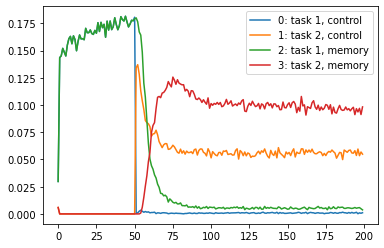

In [1]:
## DATA GENERATED WITH THIS CODE ON SPARK-K8S: https://github.com/wdurno/notebooks/blob/e64ced26a402acc09c1c2a6d1117ac6aadee09a3/regularizers-as-memory/spark-k8s-experiment-11-nlp.py
## SPARK-K8S: https://github.com/wdurno/spark-k8s/tree/v3.1.0

import pandas as pd 
import matplotlib.pyplot as plt 

df = pd.read_csv('data/df-experiment-11.zip') 
scores0 = df.scores0.tolist() 
scores1 = df.scores1.tolist() 
scores2 = df.scores2.tolist() 
scores3 = df.scores3.tolist() 

plt.plot(scores0, label='0: task 1, control') ## control: task 1 accuracy, no memory applied  
plt.plot(scores1, label='1: task 2, control') ## control: task 2 accuracy, no memory applied 
plt.plot(scores2, label='2: task 1, memory') ## experimental: task 1 accuracy, memory applied  
plt.plot(scores3, label='3: task 2, memory') ## experimental: task 2 accuracy, memory applied 
plt.legend() 
plt.show() 

### interpretation 

- The benefits of synergizing new data with memorized data are plainly clear, since the AMS roughly doubles task 2 accuracy. 
- Experimental task 1 accuracy (line 2) briefly resists catestrophic forgetting. This strongly contrasts against control task 1 accuracy (line 0), which cleanly demonstrates catestrophic forgetting. 
- Degredation between iterations 75 and 100 illustrate the importance of re-memorizing, locking-in new performance. 

## experiment 2: memory retention and online learning

In this experiment, we illustrate online learning (without an infinitely-growing stored dataset) via memory retention. 
We take our previous training dataset and break it into 10 continuous subsets, then fit 3 kinds of models.
- Model 0 is a control, only fitting to one subset at a time. The subsets are small, so overfit is induced. 
- Model 1 is a control fit to the current subset and all prior subsets, thus illustrating how models fit when they have access to all data collected so far. So, this approach corresponds to the "save & re-use all data" approach to online deep learning.
- Model 2 is the experimental case, only ever fit to one data subset at a time, but applying memorization at the end of each subset. 

The deep learning model had the same layers as in experiment 1. 

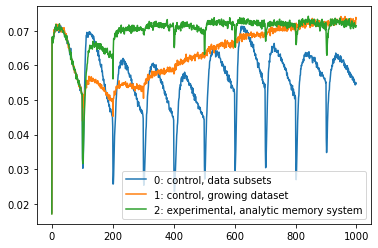

In [2]:
## DATA GENERATED WITH THIS CODE ON SPARK-K8S: https://github.com/wdurno/notebooks/blob/e64ced26a402acc09c1c2a6d1117ac6aadee09a3/regularizers-as-memory/spark-k8s-experiment-14-online-learning.py
## SPARK-K8S: https://github.com/wdurno/spark-k8s/tree/v3.1.0

import pandas as pd 
import matplotlib.pyplot as plt 

df = pd.read_csv('data/df-experiment-14.zip') 
scores0 = df.scores0.tolist() 
scores1 = df.scores1.tolist() 
scores2 = df.scores2.tolist() 

plt.plot(scores0, label='0: control, data subsets') ## control: fit to only a single data subset at a time, producing overfit 
plt.plot(scores1, label='1: control, growing dataset') ## control: fit to current and prior data subsets, simulating perfect memory 
plt.plot(scores2, label='2: experimental, analytic memory system') ## experimental: fit to current subset, but memorize all previous data subsets 
plt.legend() 
plt.show() 

### interpretation

- AMS resists overfit and retains previous observations. 
- AMS uses data _very efficiently_, reaching higher accuracies with less data, despite model 1 eventually reaching a similar accuracy. This is _super-efficient optimality_, and can also be observed in reinforcement learning in the appendix.

## discussion 

TODO describe why MNIST didn't work 

A series of different $\mathcal{I}_{\theta_0}$ estimation techniques were used in this work. 
This exploration should continue. 
For example, the Lanczos algorithm is unstable and produces low-rank estimates. 
_Padding the diagonal_ increases rank, but is an ill-informed approximation. 
It's likely that more-impressive experimental targets will require higher-quality estimates. 
I expect $\mathcal{I}_{\theta_0}$ can be entirely decomposed, perhaps via conditional independence assumptions. 

Net2Net-type model expansion \[1\] will likely continue to be useful. 
For example, even if we can store infinite data, we cannot store infinitely _diverse_ data. 
So, if we want our models to retain ever-more information, they must indeed grow.
Unfortunately, Net2Net only generalizes $\hat \theta_0$ to higher-dimensions, but we must now also generalize $\hat{\mathcal{I}}_{\theta_0}$.
So, the method must be extended to also expand Fisher information matrix. 

Super efficiency was not fully explored in this work. 
As is, the AMS only removes a few dimensions, then spends remaining data on consistency. 
There is a more-powerful trade-off that has yet to be explored. 
It is worthwhile to ask: _at what rate can we remove parameter dimensions while still maintaining consistency?_ 

Having potentially resolved catestrophic forgetting, it should now be possible to truly distribute powerful models fit on massive datasets. 
Recently produced language models may now be distributed as sufficient statistics,  
and this would empower third parties to adjust models with application-specific datasets and avoid destroying the underlying model via catestrophic forgetting. 
For example, a language model fit to books and encyclopedic data \[5\] could have a small amount of industry-specific data added to it.
The resulting transfer learning has the potential to bring relevant cognitive constructs, like well-developed grammer or simple reasoning. 

Having potentially resolved catestrophic forgetting, it may now be possible to design AI agents capable of learning independently from the data center. 
With sufficient pre-training, regardless of how large the dataset is, it'll all fit into the sufficient statistics. 
No catestrophic forgetting will occur as the agent begins to learn no data, despite not retaining the original data, only adding to the sufficient statistics instead. 
Or, perhaps, we may discover that data may need to be encorporated yet-more efficiently, thus motivating further explorations of super efficiency. 

## conclusion

This work derived asymptotic sufficient statistics for all models satisfying a few regularity assumptions. 
The result is that deep learning models now have access to sufficient statistics and so, in theory, may retain an infinite amount of data in their analytic memory system (AMS). 
This theory provides avenues to entirely overcome or substantially mitigate catestrophic forgetting. 
It is shown that the AMS is also a regularizer applying geometric constraints, thus reducing parameter space dimension during online estimation thereby attaining _super efficiency_ by lowering the Cramer-Rao lower bound. 
Experimental evidence was provided supporting these analytic results, but substantially larger, more-impactful, and more-expensive experiments should still be executed. 
Particularly, the extents of _autonomously learning agents_ and _model distribution_ need to be explored. 

## references 

\[1\] Tianqi Chen, Ian Goodfellow, Jonathon Shlens (2015). Net2Net: Accelerating Learning via Knowledge Transfer. _arXiv:1511.05641_

\[2\] Doyen Sahoo, Quang Pham, Jing Lu, Steven C.H. Hoi (2017). Online Deep Learning: Learning Deep Neural Networks on the Fly. _arXiv:1711.03705_

\[3\] Alexei Krylov (1931). On the numerical solution of equations whose solution determine the frequency of small vibrations of material systems. _Izv. Akad. Nauk. SSSR Otd Mat. Estest, 1, 491-539._ 

\[4\] Cornelius Lanczos (1950). An iteration method for the solution of the eigenvalue problem of linear differential and integral operators. _Journal of Research of the National Bureau of Standards_. 45 (4): 255–282. doi:10.6028/jres.045.026 

\[5\] Jacob Devlin, Ming-Wei Chang, Kenton Lee, Kristina Toutanova (2018). BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding. _arXiv:1810.04805_ 

# appendix: AMS applied to RL 

In this series of appendices, I reveal my early experiments wherein I initially verified and explored my results. 
All these experiments are done with small deep learning models featuring only 3 dense layers. 
_Full rank estimates_ are always used, unless stated otherwise. 


## appendix experiment 1: Cartpole

We start with a _very_ simple example, proving-out concepts. 
The goal is to prove that $M$ provides a memory effect by detecting metric lift when the observation cache is cleared. 

For our first experiment, we run Cartpole for 1000 iterations, apply an experimental condition or 
control effect to the agent, then run for another 1000 iterations. Per condition, we track the cumulative score as our metric, 
resetting to zero upon game completions. The agent performs one optimizer update per iteration. 
Naturally, the metric has high-variance, so we use Databricks to execute 1000 experiments in parallel per condition, and average the metric.
Thus, the below-plotted metrics represent average score over time. 
The same agent is used up to the 1000 iterations before copying and applying effects, hence equivalent scores for the first half. 

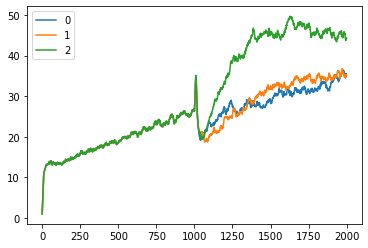

In [1]:
## DATA GENERATED WITH THIS CODE ON SPARK-K8S: https://github.com/wdurno/notebooks/blob/7dd506614aa8e4a506a19bc4179308136047005b/regularizers-as-memory/spark-k8s-experiment-1-and-2.py
## SPARK-K8S: https://github.com/wdurno/spark-k8s

import pandas as pd 
import matplotlib.pyplot as plt 

df = pd.read_csv('data/df-experiment-1-2.zip') 
scores0 = df.scores0.tolist() 
scores1 = df.scores1.tolist() 
scores2 = df.scores2.tolist() 

plt.plot(scores0, label='0') ## control 0: use no memory, discard no observations 
plt.plot(scores1, label='1') ## control 1: use no memory, discard observations at iteration 1000 
plt.plot(scores2, label='2') ## experimental condition: use memory, discard observations at iteration 1000 
plt.legend() 
plt.show() 

### interpretation 

It is clear that the regularized memory term $M$ has provided significant metric lift. 
This in itself is obviously valuable and certainly still allows $M$ to apply a memory effect. 
However, a variety of concerns still stand.
- 1. Is this just the benefit of using a regularizer? Probably not, since we only have `[32, 32]` hidden nodes, but this must be tested.
- 2. 1000 iterations is very few. Does this have any benefit late-game? How about in more-complex games?
- 3. If we are observing memory, it is in the Fisher Information matrix, an asymptotic result representing no single observations but infinitely many. 
In what nuanced ways is this memory constrained? Is it similar to long-term memory, but not short-term? 
- 4. Exact Information matrices cannot be stored for large models due to their large $O(p^2)$ memory requirement. 
Can this method be made computationally feasible?

Prior to running this experiment, I expected the control to produce the highest scores at iteration 2000. 
I expect its lower performance is due to its observation cache being loaded with data generated by random play. 
It does make sense that it should out-perform condition 1 initially, but the poorer long-run performance was surprising.
This result illustrates the limited value of infinite memory. 

Immediately after iteration 1000, scores spike and fall together. 
I interpret this as a non-informative correlation, resulting from all agents starting new games simultaneously. 

## appendix experiment 2: computational feasibility via low-rank approximations

The first concern we contend with is 4, computational feasibility. 
Usefully large models cannot use complete Fisher Information matrices, so we must experiment with approximations. 

We start by reducing the rank of the Information matrix by diagonalizing and only keeping the largest eigenvalues. 
Eigenvector and eigenvalue computation is still expensive, so this method will only prove feasibility without demonstrating a computational benefit. 

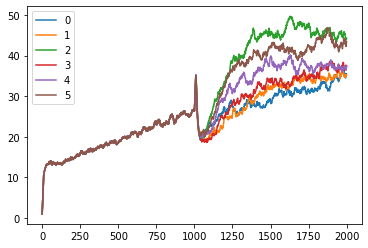

In [3]:
## DATA GENERATED WITH THIS CODE ON SPARK-K8S: https://github.com/wdurno/notebooks/blob/7dd506614aa8e4a506a19bc4179308136047005b/regularizers-as-memory/spark-k8s-experiment-1-and-2.py
## SPARK-K8S: https://github.com/wdurno/spark-k8s

df = pd.read_csv('data/df-experiment-1-2.zip') 
scores0 = df.scores0.tolist() 
scores1 = df.scores1.tolist() 
scores2 = df.scores2.tolist() 
scores3 = df.scores3.tolist() 
scores4 = df.scores4.tolist() 
scores5 = df.scores5.tolist() 

plt.plot(scores0, label='0') ## control 0: use no memory, discard no observations 
plt.plot(scores1, label='1') ## control 1: use no memory, discard observations at iteration 1000 
plt.plot(scores2, label='2') ## experimental condition 1: use memory, discard observations at iteration 1000, use complete Hessian 
plt.plot(scores3, label='3') ## experimental condition 2: use memory, discard observations at iteration 1000, use 1 eigenvector to approximate the Hessian 
plt.plot(scores4, label='4') ## experimental condition 2: use memory, discard observations at iteration 1000, use 2 eigenvectors to approximate the Hessian 
plt.plot(scores5, label='5') ## experimental condition 2: use memory, discard observations at iteration 1000, use 10 eigenvectors to approximate the Hessian
plt.legend()
plt.show()

### interpretation 

We observe that it takes about 10 eigenvectors before lift is comparable to full-rank Fisher Information matrices. 
I'm not surprised to see that higher-ranked approximations provide better lift.
With evidence supporting the low-rank approach, it is time to test the effectiveness of a low-rank matrix approximation routine.

This result shows how low rank of 10 is able to reasonably approach an optimal result. 
If universally true, then there is no need to further-explore super efficiency. 
However, this is a very simple problem and a small model. 
For complex problems and large models, substantial dimensional reductions may still be valuable. 

## appendix experiment 3: computational feasibility

TODO REMOVE THIS REPEATED CONTENT AND REPLACE WITH EXPERIMENTAL DESCRIPTION 

For production models with $p$ parameters, $\mathcal{I}$ has $O(p^2)$ values, so cannot be stored. 
Nevertheless, we have good results with rank-reduced estimates, so will attempt to estimate $AA^T \approx \mathcal{I}$ for $A \in \mathbb{R}^{p \times r}$, 
where $r$ is significantly smaller than $p$. 
Most eigenpair algorithms are designed requiring all of $\mathcal{I}$ as input - we cannot do this, so have a challenge. 
Our only advantage is that we observe gradients $G_i \sim_{idd} N_p(0, \mathcal{I} )$. 

### estimating $\mathcal{I}$

Let us proceed by attempting estimation with the _Lanczos algorithm_, where we need not deal with $\mathcal{I}$, but only $\mathcal{I}v$. 
The Lanczos algorithm is a _Krylov_ method, built around _Krylov subspace_ $\text{span}\left\{ v, \mathcal{I}v, \mathcal{I}^2v, \ldots, \mathcal{I}^{r-1}v \right\}$.

The key observation is this: we can calculate the _Krylov vectors_ $v, \mathcal{I}v, \mathcal{I}^2v, \ldots, \mathcal{I}^{r-1}v$ with computational 
efficiency when using estimate $ \hat{\mathcal{I}}  = n^{-1}\sum_i^n G_i G_i^T$. With $G_i$ and $v$ in $\mathbb{R}^{p \times 1}$, 
we can expand recursively as follows...

$$ \hat{\mathcal{I}}^m v = \hat{\mathcal{I}}^{m-1} \left( \sum_i^n G_i G_i^T \right) v = \hat{\mathcal{I}}^{m-1} \left( \sum_i^n G_i G_i^Tv \right) $$

Notice how we now work with $O(nr)$ $O(p)$-time operations (totalling $O(nrp)$-time) and no $O(p^2)$-space operations. 
This is all possible because we only ever work with vector-vector operations, matrices are never used in forming the Krylov vectors. 
So, we should enjoy computational feasibility, if $nr$ is significantly smaller than $p^2$, which is expected in a deep learning context. 

### maintaining rank-reduction while combining rank-reduced estimates 

We may wish to re-memorize information, clearing an ever-growing observation cache as sampling continues. 
See experiment 8 for an example of this. 
Say we produce estimate $A_1 A_1^T$ at time step $t_1$ and $A_2 A_2^T$ at time step $t_2$. 
Notice that the naively combined estimate $A_1 A_1^T + A_2 A_2^T$ does not sustain its rank-reduced form, so violates our $O(p^2)$ space constraint. 
Fortunately, our Krylov estimation method can be slightly modified to maintain rank reduction. 

Calculate Krylov vectors $\{v, (A_1 A_1^T + A_2 A_2^T)v, (A_1 A_1^T + A_2 A_2^T)^2v, \ldots, (A_1 A_1^T + A_2 A_2^T)^{r-1}v \}$. 
Notice that, like above $(A_1 A_1^T + A_2 A_2^T)^{r-1}v = (A_1 A_1^T + A_2 A_2^T)^{r-2}(A_1 A_1^Tv + A_2 A_2^Tv)$, recursively. 
However, instead of vector-vector operations we have matrix-vector operations, but always with smaller $\mathbb{R}^{p \times r}$ matrices. 
So, each matrix-vector operation takes $O(rp)$ time, calculating all vectors takes $O(r^2p)$ time, and we observe our $O(p^2)$ space constraint. 

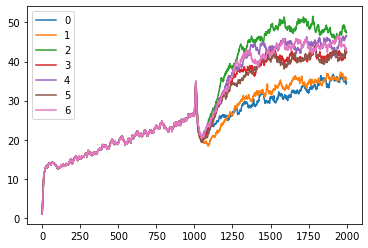

In [2]:
## DATA GENERATED WITH THIS CODE ON SPARK-K8S: https://github.com/wdurno/notebooks/blob/60aced4f32f049f1edcf4a1e497779d94cdef5b4/regularizers-as-memory/spark-k8s-experiment-3-comp-feasiblity.py
## SPARK-K8S: https://github.com/wdurno/spark-k8s

import pandas as pd 
import matplotlib.pyplot as plt 

df = pd.read_csv('data/df-experiment-3.zip') 
scores0 = df.scores0.tolist() 
scores1 = df.scores1.tolist() 
scores2 = df.scores2.tolist() 
scores3 = df.scores3.tolist() 
scores4 = df.scores4.tolist() 
scores5 = df.scores5.tolist() 
scores6 = df.scores6.tolist() 

plt.plot(scores0, label='0') ## condition 0 (control): No use of memory, do not discard data 
plt.plot(scores1, label='1') ## condition 1 (control): No use of memory, do discard data 
plt.plot(scores2, label='2') ## condition 2 (control): Use memory, do discard data 
plt.plot(scores3, label='3') ## condition 3 (control): Use memory, do discard data, use a rank-5 eigen-approximation 
plt.plot(scores4, label='4') ## condition 4 (control): Use memory, do discard data, use a rank-10 eigen-approximation 
plt.plot(scores5, label='5') ## condition 5 (experimental): Use memory, do discard data, use a rank-5 Krylov approximation 
plt.plot(scores6, label='6') ## condition 6 (experimental): Use memory, do discard data, use a rank-10 Kyrlov approximation 
plt.legend()
plt.show()

### interpretation

The Krylov method produce results comparable to eigenvector rank reduction, but in $O(nrp)$ time - very powerful.
Further, the $O(p^2)$-space $\mathcal{I}$ need never be stored in memory, only the $O(rp)$-space rank-reduced estimate. 

## appendix experiment 4: comparison with L2 regularization

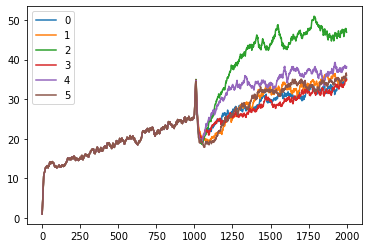

In [2]:
## DATA GENERATED WITH THIS CODE ON SPARK-K8S: https://github.com/wdurno/notebooks/blob/7dd506614aa8e4a506a19bc4179308136047005b/regularizers-as-memory/spark-k8s-experiment-4-l2-regularizer.py
## SPARK-K8S: https://github.com/wdurno/spark-k8s

df = pd.read_csv('data/df-experiment-4.zip') 
scores0 = df.scores0.tolist() 
scores1 = df.scores1.tolist() 
scores2 = df.scores2.tolist() 
scores3 = df.scores3.tolist() 
scores4 = df.scores4.tolist() 
scores5 = df.scores5.tolist() 

plt.plot(scores0, label='0') ## No use of memory, no discarding of data 
plt.plot(scores1, label='1') ## No use of memory, do discard data 
plt.plot(scores2, label='2') ## Use memory, do discard data 
plt.plot(scores3, label='3') ## No use of memory, do not discard data, use L2 Regularizer = 1
plt.plot(scores4, label='4') ## No use of memory, do not discard data, use L2 Regularizer = 100
plt.plot(scores5, label='5') ## No use of memory, do discard data, use L2 Regularizer = 1 
plt.legend()
plt.show()

### interpretation 

TODO
- L2 under-performs but does add lift
- argue $M$ is actually an _optimal_ regularizer

## appendix experiment 5: long games and convergence bahavior

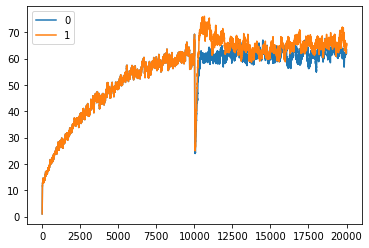

In [1]:
## DATA GENERATED WITH THIS CODE ON SPARK-K8S: ## https://github.com/wdurno/notebooks/blob/7dd506614aa8e4a506a19bc4179308136047005b/regularizers-as-memory/spark-k8s-experiment-5-long-games.py
## SPARK-K8S: https://github.com/wdurno/spark-k8s

import pandas as pd 
import matplotlib.pyplot as plt 

df = pd.read_csv('data/df-experiment-5.zip') 
scores0 = df.scores0.tolist() 
scores1 = df.scores1.tolist() 

plt.plot(scores0, label='0') ## condition 0 (control), without application of memory and without discarding data
plt.plot(scores1, label='1') ## condition 1 (experimental): Use memory, discard data
plt.legend()
plt.show()

#### interpretation

- At optimal play, memory confers less benefit.

## appendix experiment 6: optimal $\lambda$

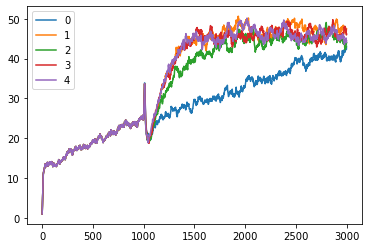

In [1]:
## DATA GENERATED WITH THIS CODE ON SPARK-K8S: ## https://github.com/wdurno/notebooks/blob/cd2f4a3d3fcb54f5a3ec834550889e717891cedd/regularizers-as-memory/spark-k8s-experiment-6-optimal-lambda.py 
## SPARK-K8S: https://github.com/wdurno/spark-k8s

import pandas as pd 
import matplotlib.pyplot as plt 

df = pd.read_csv('data/df-experiment-6.zip') 
scores0 = df.scores0.tolist() 
scores1 = df.scores1.tolist() 
scores2 = df.scores2.tolist() 
scores3 = df.scores3.tolist() 
scores4 = df.scores4.tolist() 

plt.plot(scores0, label='0') ## condition 0 (control), without application of memory and without discarding data
plt.plot(scores1, label='1') ## condition 1 (control): Use memory, clear data, lambda = 1
plt.plot(scores2, label='2') ## condition 2 (experimental): Use memory, clear data, optimal lambda = n1/n2
plt.plot(scores3, label='3') ## condition 3 (experimental): Use memory, clear data, lambda = n1/(n1+n2)
plt.plot(scores4, label='4') ## condition 4 (experimental): Use memory, clear data, near-optimal lambda = min(1, n1/n2)
plt.legend()
plt.show()

### interpretation

- Optimal $\lambda$ performed produced less lift, perhaps due to over-parameterization. 
- Near-optimal $\lambda$ with numerical stabilizer performed better. 

## appendix experiment 7: overcoming forgetting 

Demonstrating transfer learning is equivalent to overcoming catastrophic forgetting. 
Reinforcement learning games' sample space changes with gameplay, so are almost stationary. 
Therefore, any forgetting in RL is a poor illustration of catarophic forgetting. 
However, some forgetting should be possible. 

In this experiment, we test regularization-as-memory's ability to overcome this forgetting. 
We do so by re-running experiment 1, but with 10 times more samples, thereby increasing statistical power. 

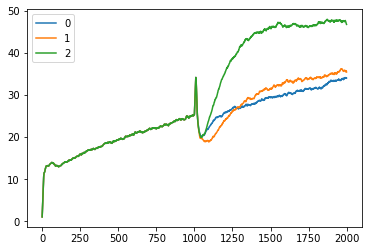

In [1]:
## DATA GENERATED WITH THIS CODE ON SPARK-K8S: https://github.com/wdurno/notebooks/blob/0add09936dd1261b79f19e6f3d0dd3c70b929f57/regularizers-as-memory/spark-k8s-experiment-7-forgetting.py 
## SPARK-K8S: https://github.com/wdurno/spark-k8s

import pandas as pd 
import matplotlib.pyplot as plt 

df = pd.read_csv('data/df-experiment-7.zip') 
scores0 = df.scores0.tolist() 
scores1 = df.scores1.tolist() 
scores2 = df.scores2.tolist() 

plt.plot(scores0, label='0') ## condition 0 (control), without application of memory and without discarding data 
plt.plot(scores1, label='1') ## condition 1 (control): No use of memory, do discard data 
plt.plot(scores2, label='2') ## condition 2 (experimental): Use memory, do discard data  
plt.legend() 
plt.show() 

### interpretation 

- This is about the best result we could've hoped for. 
Condition 1 (no memory, data discarded) visibly drops below the control (condition 0). 
This illustrates forgetting. 
- It is interesting that condition 1 eventually out-performs condition 0. 
I expect this is due to 
  - the agent having to first re-make mistakes, 
  - but then eventually having an observation queue with overall-more-important data. 
- The analytic storage mechanism employed by regularization-as-memory (condition 2) out-performs other conditions impressively. 
I expect the benefit comes from
  - mistakes not having to be remade, 
  - and the standard dimensional-reduction benefits of a regularizer. 

Combining the observations of (1) forgetting indeed occurring, and (2) regularization-as-memory overcoming forgetting 
suggests it's time to scale-this-up to a more-important transfer learning context. 
Instead of transfer learning within a game, we should test transfer learning between similar games. 
If successful, no-stronger a result should be expected due to our foundational _almost-stationary_ assumption. 
Instead, the burden will fall upon AI developers to construct continuity in transfer learning contexts. 

## appendix experiment 8: relearning

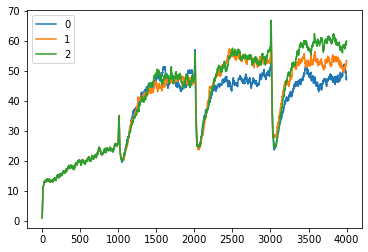

In [1]:
## DATA GENERATED WITH THIS CODE ON SPARK-K8S: https://github.com/wdurno/notebooks/blob/b3d82fad78355d5c8013d160a28018510f557bd1/regularizers-as-memory/spark-k8s-experiment-8-relearning.py
## SPARK-K8S: https://github.com/wdurno/spark-k8s

import pandas as pd 
import matplotlib.pyplot as plt 

df = pd.read_csv('data/df-experiment-8.zip') 
scores0 = df.scores0.tolist() 
scores1 = df.scores1.tolist() 
scores2 = df.scores2.tolist() 

plt.plot(scores0, label='0') ## condition 0 (control) Use memory, do discard data, memorize once
plt.plot(scores1, label='1') ## condition 1 (experimental): Use memory, do dicard data, memorize twice
plt.plot(scores2, label='2') ## condition 2 (experimental): Use memory, do discard data, memorize thrice
plt.legend() 
plt.show() 

### interpretation 

Re-applying learning confers a significant benefit. 
I'll consider continuous learning first. 

### interpretation

This game is too simple. I need a transfer learning problem which can actually benefit from storing old data.